In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
__author__ = "Barkın Ünal"

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, make_scorer

def classification_report_with_accuracy_score(y_true, y_pred):

    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

%matplotlib inline

In [33]:

data = pd.read_csv("dataset_4.csv", index_col = 0)
data = data.rename({"0": "text"}, axis=1)
data1=data.sort_values("label")
data1

,Unnamed: 0.1,tweet,label
14848,14848,im in miami u fucking gringo,0
13255,13255,you know you fucking up if george bush calling...,0
13254,13254,today i fucked with a ps4 controller snapch...,0
13253,13253,i fucking lost it,0
13252,13252,fucking stoke fan calling us bin dippers lmfao...,0
...,...,...,...
7215,7215,im letting u know now we not protesting when ...,1
7214,7214,i really hate driving with a passion now shits...,1
7213,7213,im letting u know now we not protesting when ...,1
7220,7220,what idiot called it devoutness instead of ...,1


In [39]:
def bag_word(documents, stop_word=True,n_gram=(1,1)):

    # If stop words want to be excluded.
    if stop_word:
        if n_gram == (1,1):
            tfidfconverter = TfidfVectorizer(ngram_range=n_gram, stop_words='english', min_df=0.0005)
        else:
            tfidfconverter = TfidfVectorizer(ngram_range=n_gram, stop_words='english', min_df=0.0005)
    
    # If stop words want to be included
    if not stop_word:
        if n_gram == (1, 1):
            tfidfconverter = TfidfVectorizer(ngram_range=n_gram, min_df=0.0005)
        else:
            tfidfconverter = TfidfVectorizer(ngram_range=n_gram, min_df=0.0005)

    X = tfidfconverter.fit_transform(documents).toarray()

    return X

In [35]:
def get_accuracy(prediction, y_test):
    correct = 0
    total = 0
    for i in range(len(prediction)):
        if prediction[i] == y_test.iloc[i]:
            correct += 1
        total += 1

    return correct / total

In [36]:
def draw_plot(range_list, value_list, title_str, x_label_str, y_label_str):

    plt.plot(range_list, value_list, color="b", linestyle="dashed", marker="o", markerfacecolor="r")
    plt.title(title_str)
    plt.xlabel(x_label_str)
    plt.ylabel(y_label_str)
    plt.show()

In [44]:
acc_list_wo_stop = []
acc_list_w_stop = []
for i in range(1, 7):
    for exp in [True, False]:
        X = data['tweet'].values.astype('U')
        y = data["label"].values.astype('int32')
        X = bag_word(X, stop_word=exp, n_gram=(i, i))
        clfrNB = MultinomialNB()
        scores = cross_val_score(clfrNB, X, y,  cv=10)
        acc = scores.mean()
        if exp:
            print("MultinomialNB ", i, "- gram without stopwords : ", acc) 
            acc_list_wo_stop.append(acc)
        else:
            print("MultinomialNB ", i, "- gram with stopwords : ", acc)
            acc_list_w_stop.append(acc)


MultinomialNB  1 - gram without stopwords :  0.7342927404565
MultinomialNB  1 - gram with stopwords :  0.7102215318415958
MultinomialNB  2 - gram without stopwords :  0.6943183455563883
MultinomialNB  2 - gram with stopwords :  0.7273548988600822
MultinomialNB  3 - gram without stopwords :  0.634081186055979
MultinomialNB  3 - gram with stopwords :  0.6537127338154535
MultinomialNB  4 - gram without stopwords :  0.6247879609550001
MultinomialNB  4 - gram with stopwords :  0.6345524985605209
MultinomialNB  5 - gram without stopwords :  0.6197709553187265
MultinomialNB  5 - gram with stopwords :  0.6300404187827112
MultinomialNB  6 - gram without stopwords :  0.6164377916581971
MultinomialNB  6 - gram with stopwords :  0.6277506975196065


In [50]:
n_range_list = ["1-gram","2-gram","3-gram","4-gram","5-gram","6-gram",]

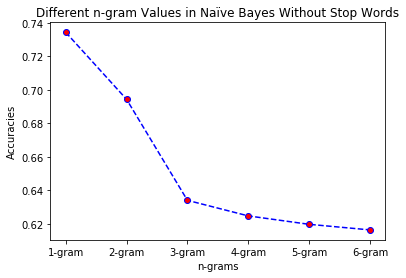

In [51]:
draw_plot(n_range_list, acc_list_wo_stop, "Different n-gram Values in Naïve Bayes Without Stop Words", "n-grams", "Accuracies")

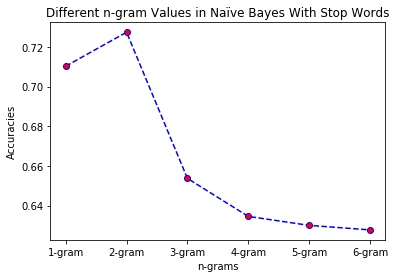

In [52]:
draw_plot(n_range_list, acc_list_w_stop, "Different n-gram Values in Naïve Bayes With Stop Words", "n-grams", "Accuracies")